In [1]:
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from ema_workbench import (Model, CategoricalParameter,
                           ScalarOutcome, IntegerParameter, RealParameter, save_results)
from dike_model_function import DikeNetwork  # @UnresolvedImport

def sum_over(*args):
    return sum(args)

ModuleNotFoundError: No module named 'dike_model_function'

In [3]:
from ema_workbench import (Model, RealParameter, ScalarOutcome, SequentialEvaluator,
                           MultiprocessingEvaluator, ema_logging,
                           Constant, Policy, Scenario)

ema_logging.log_to_stderr(ema_logging.INFO)

from ema_workbench.em_framework.evaluators import perform_experiments
from ema_workbench.em_framework.samplers import sample_uncertainties
from ema_workbench import ScalarOutcome
from ema_workbench.util import ema_logging
import time
from problem_formulation_V2_0 import get_model_for_actor_problem_formulation

ema_logging.log_to_stderr(ema_logging.INFO)

ModuleNotFoundError: No module named 'problem_formulation_V2_0'

In [12]:
#generate the model --Change the argument for different actor formulations
model, planning_steps = get_model_for_actor_problem_formulation(1, outcome_type='scalar')

In [13]:
#for unc in dike_model.uncertainties:
#    print(repr(unc))
uncertainties = dike_model.uncertainties

import copy
uncertainties = copy.deepcopy(dike_model.uncertainties)

In [14]:
#for policy in dike_model.levers:
# print(repr(policy))
levers = model.levers 

import copy
levers = copy.deepcopy(model.levers)

In [15]:
#for outcome in dike_model.outcomes:
#    print(repr(outcome))

In [16]:
#within here, we can generate user defined reference scenarios to draw a lot of policies from
#We sample 1000 policies over the reference scenario for a first exploration of the effect of certain policies combinations
# This code is a copy of dike_model_simulation.py
#create reference case of policy levers all set to 0
levs = []
for lev in model.levers:
    levs.append(lev)\

do_nothing_policy = Policy("do nothing", **{lever.name:0 for lever in levs})

# Build a user-defined scenario and policy:
reference_values = {'Bmax': 175, 'Brate': 1.5, 'pfail': 0.5,
                        'ID flood wave shape': 4, 'planning steps': 2}
reference_values.update({'discount rate {}'.format(n): 3.5 for n in planning_steps})
scen1 = {}

for key in model.uncertainties:
    name_split = key.name.split('_')

    if len(name_split) == 1:
        scen1.update({key.name: reference_values[key.name]})
    else:
        scen1.update({key.name: reference_values[name_split[1]]})

ref_scenario = Scenario('reference', **scen1)

#no dike increase, no warning, none of the rfr
zero_policy = {'DaysToThreat': 0}
zero_policy.update({'DikeIncrease {}'.format(n): 0 for n in planning_steps})
zero_policy.update({'RfR {}'.format(n): 0 for n in planning_steps})
pol0 = {}

for key in model.levers:
    s1, s2 = key.name.split('_')
    pol0.update({key.name: zero_policy[s2]})

policy0 = Policy('Policy 0', **pol0)

    # Call random scenarios or policies:
#    n_scenarios = 5
#    scenarios = sample_uncertainties(dike_model, 50)
#    n_policies = 10

    # single run
#    start = time.time()
#    dike_model.run_model(ref_scenario, policy0)
#    end = time.time()
#    print(end - start)
#    results = dike_model.outcomes_output
    
#define convergence metrics --COMPUTATIONALLY EXPENSIVE SO COMMENT OUT WHERE NECESSARY
#specifying min and max values...play around with this max!!
#convergence_metrics = [HyperVolume(minimum=[0,0,0], maximum=[2e08,2e08,100]), EpsilonProgress()]

In [59]:
with MultiprocessingEvaluator(model) as evaluator:
    results = evaluator.perform_experiments(scenarios = ref_scenario, policies = 1000)

[MainProcess/INFO] pool started
[MainProcess/INFO] performing 1 scenarios * 50 policies * 1 model(s) = 50 experiments
[MainProcess/INFO] 5 cases completed
[MainProcess/INFO] 10 cases completed
[MainProcess/INFO] 15 cases completed
[MainProcess/INFO] 20 cases completed
[MainProcess/INFO] 25 cases completed
[MainProcess/INFO] 30 cases completed
[MainProcess/INFO] 35 cases completed
[MainProcess/INFO] 40 cases completed
[MainProcess/INFO] 45 cases completed
[MainProcess/INFO] 50 cases completed
[MainProcess/INFO] experiments finished
[MainProcess/INFO] terminating pool


In [60]:
#savethe results to a tar file which can be used whenever you want
save_results(results, r'./1000 runs.tar.gz')

[MainProcess/INFO] results saved successfully to C:\Users\ivarnieuwepc\Desktop\Master EPA\EPA1361 Model Based Decision Making\mbdm_1_RfR\Analysis - generate alternatives\Model\50 runs.tar.gz


In [91]:
perform_experiments??

In [48]:
total_df

,Unnamed: 0,Expected Annual Damage,Dike Investment Costs,RfR Investment Costs,Evacuation Costs,Expected Number of Deaths,discount rate 0,discount rate 1,discount rate 2,A.0_ID flood wave shape,...,model,A.1_overall_height_increase,A.2_overall_height_increase,A.3_overall_height_increase,A.4_overall_height_increase,A.5_overall_height_increase,Average_height_increase_all_locations,Average_RfR_over_all_locations,Average_RfR_over_all_locations1,heighest increase
0,0,4.411918e+06,6.664608e+08,6.925000e+08,235.342659,0.000769,3.5,3.5,3.5,4.0,...,dikesnet,19.0,8.0,20.0,11.0,17.0,15.0,1.5,,2
1,1,0.000000e+00,7.572993e+08,1.092100e+09,0.000000,0.000000,3.5,3.5,3.5,4.0,...,dikesnet,10.0,17.0,13.0,20.0,25.0,17.0,1.5,,4
2,2,0.000000e+00,7.923548e+08,1.305500e+09,0.000000,0.000000,3.5,3.5,3.5,4.0,...,dikesnet,18.0,24.0,10.0,11.0,11.0,14.8,1.7,,1
3,3,3.839575e+06,5.434527e+08,1.386500e+09,102.313994,0.002990,3.5,3.5,3.5,4.0,...,dikesnet,5.0,14.0,6.0,20.0,16.0,12.2,1.7,,3
4,4,0.000000e+00,8.851338e+08,9.265000e+08,0.000000,0.000000,3.5,3.5,3.5,4.0,...,dikesnet,23.0,21.0,13.0,14.0,21.0,18.4,1.5,,0
5,5,6.976983e+05,5.145588e+08,1.241700e+09,53.897194,0.000098,3.5,3.5,3.5,4.0,...,dikesnet,11.0,14.0,11.0,10.0,7.0,10.6,2.5,,1
6,6,0.000000e+00,8.023496e+08,1.268900e+09,0.000000,0.000000,3.5,3.5,3.5,4.0,...,dikesnet,16.0,23.0,12.0,18.0,13.0,16.4,1.9,,1
7,7,0.000000e+00,6.973802e+08,1.184300e+09,0.000000,0.000000,3.5,3.5,3.5,4.0,...,dikesnet,22.0,11.0,26.0,14.0,9.0,16.4,1.5,,2
8,8,1.542136e+07,6.800851e+08,4.177000e+08,974.662876,0.004060,3.5,3.5,3.5,4.0,...,dikesnet,13.0,18.0,14.0,18.0,16.0,15.8,1.1,,1
9,9,7.953972e+06,6.520654e+08,1.386500e+09,256.568764,0.003285,3.5,3.5,3.5,4.0,...,dikesnet,19.0,16.0,15.0,10.0,11.0,14.2,1.7,,0


In [1]:
total_df = pd.read_csv('Results_1000_policies_under_reference_scenario.csv')

In [60]:
#put all outputs in dataframe for visalisation and data aggregation purposes
experiments,outcomes = results
experiments = pd.DataFrame(experiments)
output = pd.DataFrame(outcomes)

total_df = pd.merge(output, experiments, left_index=True, right_index=True)

NameError: name 'results' is not defined

In [4]:
#quick overview of data by looking at average dike increase, days to rethreat, avg rfr projects
total_df['A.1_overall_height_increase'] = total_df['A.1_DikeIncrease 0'] + total_df['A.1_DikeIncrease 1'] + total_df['A.1_DikeIncrease 2']
total_df['A.2_overall_height_increase'] = total_df['A.2_DikeIncrease 0'] + total_df['A.2_DikeIncrease 1'] + total_df['A.2_DikeIncrease 2']
total_df['A.3_overall_height_increase'] = total_df['A.3_DikeIncrease 0'] + total_df['A.3_DikeIncrease 1'] + total_df['A.3_DikeIncrease 2']
total_df['A.4_overall_height_increase'] = total_df['A.4_DikeIncrease 0'] + total_df['A.4_DikeIncrease 1'] + total_df['A.4_DikeIncrease 2']
total_df['A.5_overall_height_increase'] = total_df['A.5_DikeIncrease 0'] + total_df['A.5_DikeIncrease 1'] + total_df['A.5_DikeIncrease 2']

total_df['Average_height_increase_all_locations'] = (total_df['A.1_overall_height_increase'] + total_df['A.2_overall_height_increase'] + total_df['A.3_overall_height_increase'] +total_df['A.4_overall_height_increase'] + total_df['A.5_overall_height_increase'])/5 
total_df['Average_RfR_over_all_locations'] = total_df.iloc[:,24:39].sum(axis = 1 ) / 5
total_df['heighest increase'] = total_df.iloc[:,59:64].values.argmax(axis=1)

output_get_1 = total_df.iloc[:,1:6]
output_get_2 = total_df.iloc[:,-3:-1]
output_get_3 = total_df.iloc[:,55]
output_get_4 = total_df.iloc[:,66]

aggregated_df = pd.merge(output_get_1, output_get_2, left_index=True, right_index=True)
aggregated_df = pd.merge(aggregated_df, output_get_3, left_index=True, right_index=True)
aggregated_df = pd.merge(aggregated_df, output_get_4, left_index=True, right_index=True)

#total_df.columns.get_loc('EWS_DaysToThreat')

In [5]:
aggregated_df

,Expected Annual Damage,Dike Investment Costs,RfR Investment Costs,Evacuation Costs,Expected Number of Deaths,Average_height_increase_all_locations,Average_RfR_over_all_locations,EWS_DaysToThreat,heighest increase
0,4.411918e+06,6.664608e+08,6.925000e+08,235.342659,0.000769,15.0,1.5,2.0,2
1,0.000000e+00,7.572993e+08,1.092100e+09,0.000000,0.000000,17.0,1.5,0.0,4
2,0.000000e+00,7.923548e+08,1.305500e+09,0.000000,0.000000,14.8,1.7,4.0,1
3,3.839575e+06,5.434527e+08,1.386500e+09,102.313994,0.002990,12.2,1.7,1.0,3
4,0.000000e+00,8.851338e+08,9.265000e+08,0.000000,0.000000,18.4,1.5,2.0,0
5,6.976983e+05,5.145588e+08,1.241700e+09,53.897194,0.000098,10.6,2.5,4.0,1
6,0.000000e+00,8.023496e+08,1.268900e+09,0.000000,0.000000,16.4,1.9,0.0,1
7,0.000000e+00,6.973802e+08,1.184300e+09,0.000000,0.000000,16.4,1.5,4.0,2
8,1.542136e+07,6.800851e+08,4.177000e+08,974.662876,0.004060,15.8,1.1,4.0,1
9,7.953972e+06,6.520654e+08,1.386500e+09,256.568764,0.003285,14.2,1.7,1.0,0


In [71]:
#aggregated_df.columns.unique()

In [76]:
sns.pairplot??

C:\Users\ivarnieuwepc\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


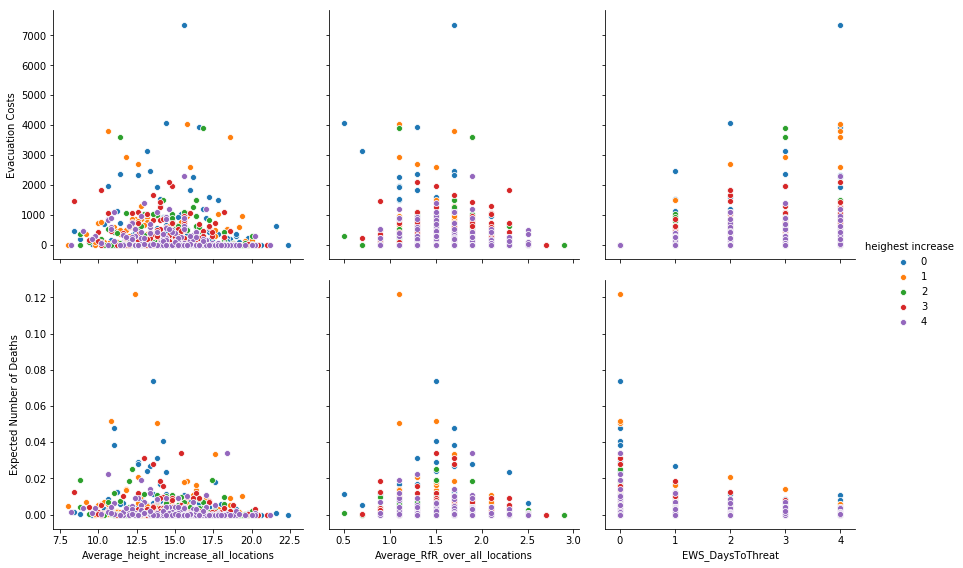

In [27]:
sns_plot= sns.pairplot(pd.DataFrame.from_dict(aggregated_df), hue = 'heighest increase',   y_vars=['Evacuation Costs', 'Expected Number of Deaths'], x_vars=['Average_height_increase_all_locations',
       'Average_RfR_over_all_locations', 'EWS_DaysToThreat'],size = 4)
plt.show()
sns_plot .savefig('1000_experiments_evacuationcost_numberofdeathsl.png') 

C:\Users\ivarnieuwepc\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


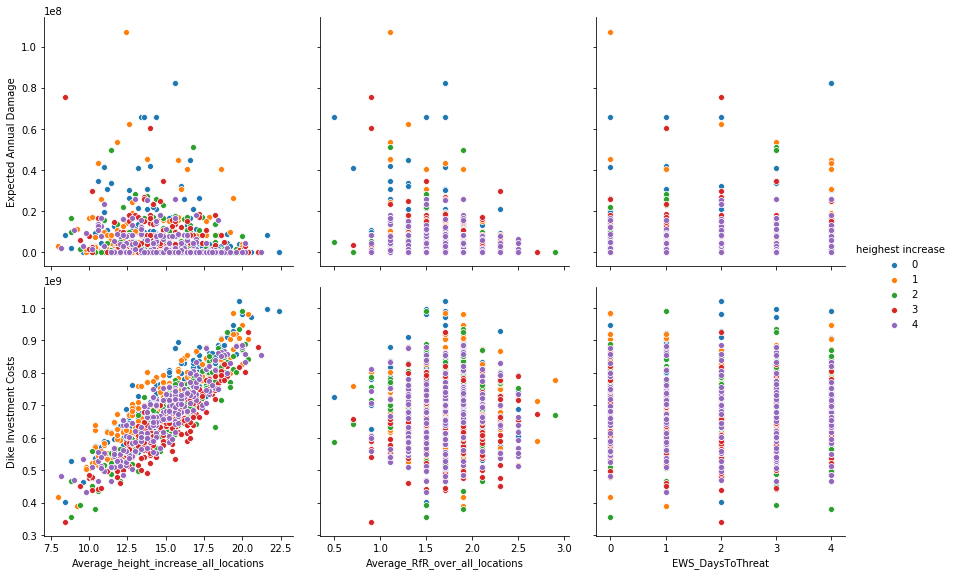

In [23]:
sns_plot  = sns.pairplot(pd.DataFrame.from_dict(aggregated_df), hue = 'heighest increase',   y_vars=['Expected Annual Damage', 'Dike Investment Costs'], x_vars=['Average_height_increase_all_locations',
       'Average_RfR_over_all_locations', 'EWS_DaysToThreat'],size = 4)
sns_plot .savefig('1000_experiments_dike_investment_anual_damage.png') 

C:\Users\ivarnieuwepc\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


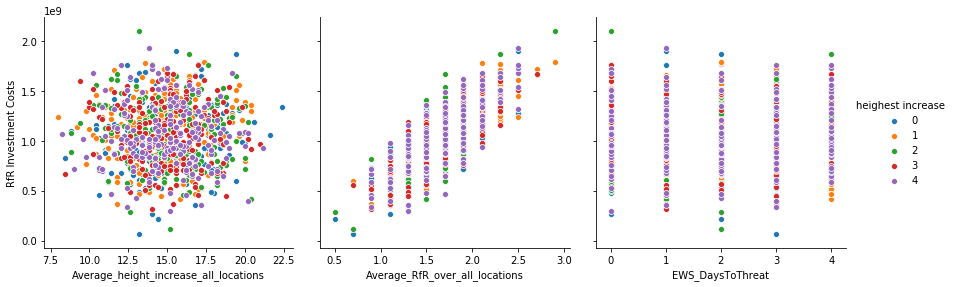

In [24]:
sns_plot  = sns.pairplot(pd.DataFrame.from_dict(aggregated_df), hue = 'heighest increase',   y_vars=['RfR Investment Costs'], x_vars=['Average_height_increase_all_locations',
       'Average_RfR_over_all_locations', 'EWS_DaysToThreat'],size = 4)
sns_plot .savefig('1000_experiments_RfRcosts.png') 

In [ ]:
#for lever in model.levers:
#   print(lever.name)

In [ ]:
#for unc in model.uncertainties:
 #   print(repr(unc))

In [ ]:
#for outcome in model.outcomes:
 #   print(repr(outcome))

In [40]:
#sensitivity analysis 1000 policies on reference scenario
results_1000_exp = pd.read_csv('Results_1000_policies_under_reference_scenario.csv')
outcomes = results_1000_exp.iloc[:,1:4]
experiments = results_1000_exp.iloc[:,7:59]
#outcomes =
#experiments, outcomes = results

In [41]:
outcomes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
Expected Annual Damage    1000 non-null float64
Dike Investment Costs     1000 non-null float64
RfR Investment Costs      1000 non-null float64
dtypes: float64(3)
memory usage: 23.5 KB


In [82]:
Y1 = outcomes['Expected Number of Deaths']
Y2 = outcomes['RfR Investment Costs']
Y3 = outcomes['Dike Investment Costs']
Y4 = outcomes['Evacuation Costs']
Y5 = outcomes['Expected Annual Damage']

In [68]:
# Importing the modules used for EMA Workbench
from ema_workbench import (RealParameter, CategoricalParameter, IntegerParameter, ema_logging, load_results, save_results)
from ema_workbench.em_framework import (get_SALib_problem)
from ema_workbench import load_results
ema_logging.log_to_stderr(ema_logging.INFO)

# Importing sobol from the SALib library
from SALib.analyze import sobol

# Importing the problem formulation function
from problem_formulation import get_model_for_problem_formulation

In [69]:
get_SALib_problem??

In [67]:
levers = []
for lev in model.levers:
    levers.append(lev)
    
problem = get_SALib_problem(levers)



NameError: name 'get_SALib_problem' is not defined

In [94]:
sobol.analyze??

In [89]:
Y1 = outcomes['Expected Number of Deaths']

In [1]:
# Executing Sobol sensitivity analysis for each uncertainty on the expected number of deaths
scores_deaths = sobol.analyze(problem, Y1, calc_second_order=True, print_to_console=True)

# Executing Sobol sensitivity analysis for each uncertainty on the total investment costs
#scores_costs = sobol.analyze(problem, Y2, calc_second_order=True, print_to_console=True)

# Executing Sobol sensitivity analysis for each uncertainty on the expected annual damage
#scores_damage = sobol.analyze(problem, Y3, calc_second_order=True, print_to_console=True)

NameError: name 'sobol' is not defined